In [200]:
using DataFrames, CSV, Plots, Dates

In [246]:
raw_data = readdir("./data")
df = DataFrame()

for file in raw_data
    df_ = CSV.File("./data/" * file) |> DataFrame
    df = vcat(df, df_)
end

In [247]:
rename!(df, :AE_kWh => :kwh)
df = df[:, ["Fecha", "Hora", "kwh"]]
df.kwh = parse.(Float64, replace.(df.kwh, "," => "."))

df.Hora = df.Hora .- 1
df.Hora = lpad.(df.Hora, 2, "0");

In [248]:
df.Hora = ":" .* df.Hora
df.DateTime = join.(eachrow(df[:,["Fecha", "Hora"]]))
format = dateformat"dd/mm/yyyyy:HH"
df.DateTime = DateTime.(df.DateTime, format)
df = df[:, ["DateTime", "kwh"]]

14567×2 DataFrame
   Row │ DateTime             kwh     
       │ DateTime             Float64 
───────┼──────────────────────────────
     1 │ 2022-11-09T00:00:00    0.094
     2 │ 2022-11-09T01:00:00    0.092
     3 │ 2022-11-09T02:00:00    0.088
     4 │ 2022-11-09T03:00:00    0.088
     5 │ 2022-11-09T04:00:00    0.041
     6 │ 2022-11-09T05:00:00    0.083
     7 │ 2022-11-09T06:00:00    0.088
     8 │ 2022-11-09T07:00:00    0.036
     9 │ 2022-11-09T08:00:00    0.6
    10 │ 2022-11-09T09:00:00    0.095
    11 │ 2022-11-09T10:00:00    0.042
   ⋮   │          ⋮              ⋮
 14558 │ 2024-07-07T14:00:00    0.093
 14559 │ 2024-07-07T15:00:00    0.078
 14560 │ 2024-07-07T16:00:00    0.093
 14561 │ 2024-07-07T17:00:00    0.077
 14562 │ 2024-07-07T18:00:00    0.2
 14563 │ 2024-07-07T19:00:00    0.18
 14564 │ 2024-07-07T20:00:00    0.202
 14565 │ 2024-07-07T21:00:00    0.404
 14566 │ 2024-07-07T22:00:00    0.395
 14567 │ 2024-07-07T23:00:00    0.232
                    14546 rows omitted

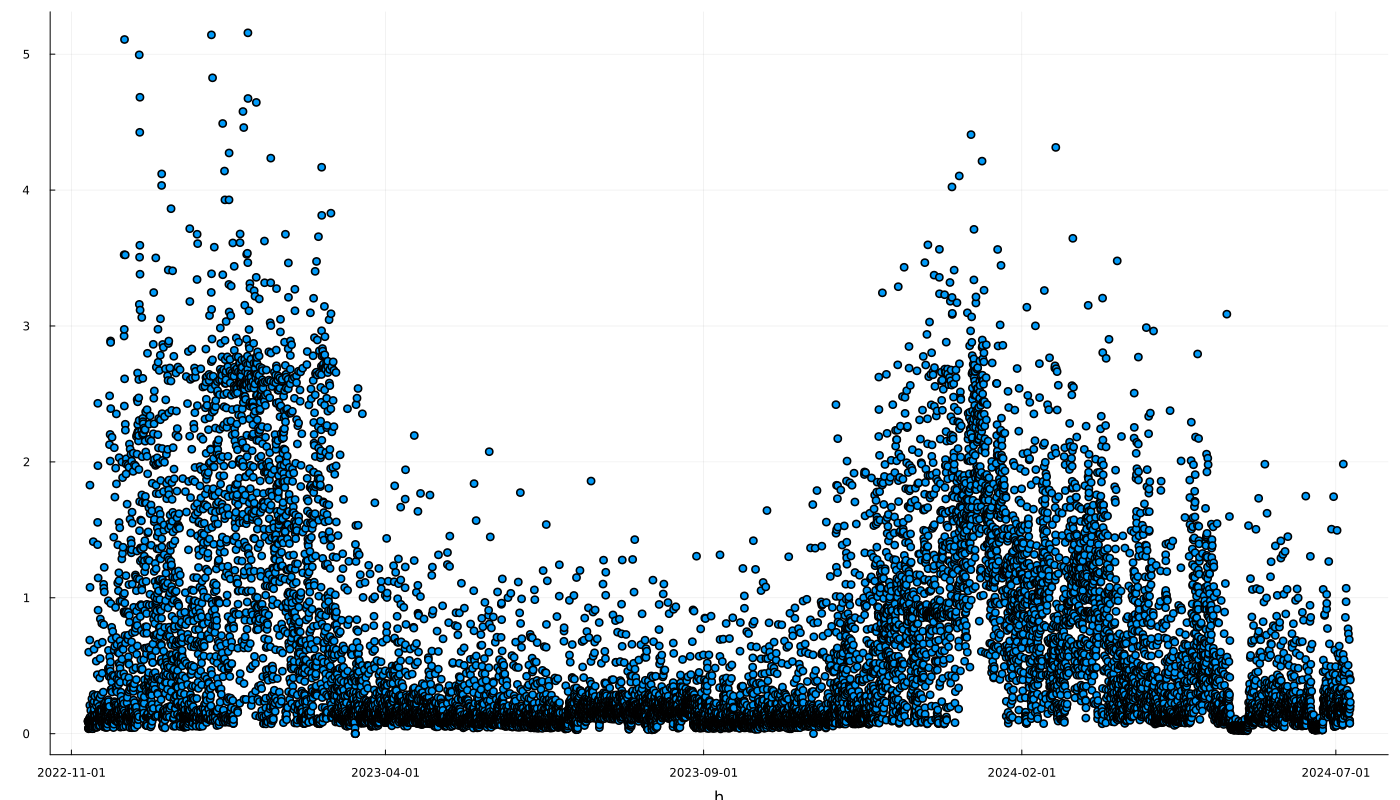

In [251]:
scatter(df.DateTime, df.kwh, xlabel="h", ylabel="kWh", label=false, size=(1400, 800))